In [1]:
from scipy.stats import binom
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Sign test 

- A non-parametric test to compare the medians of two paired samples
- Makes no assumption about the underlying distribution of the data
- The null hypothesis is that the two sets of paired samples have the same median
- Given two sets of paired samples, compute the test statistic: the number of pairs where the value of a sample in the first set is greater than the sample in the second set 
- The p-value of the test statistic is the sum of probabilities corresponding to all possible test statistics that are at least as extreme as the test statistic. 

For example, given two sets each with 10 paired samples and a test statistic of 9, the p-value is the probability of observing that at least 9 out of the 10 samples in the first set were greater than the corresponding samples in the second set assuming a 50% chance that a sample in the first set is greater than the corresponding sample in the second set. The p-value is therefore the sum of the probability of observing 9 out of 10 instances where the sample in set 1 was greater than the sample in set 2 plus the probability of observing 10 out of 10 instances where the sample in set 1 was greater than the sample in set 2, assuming a 50/50 chance that a sample in set 1 will be greater than a sample in set 2. The binomial distribution can be used to compute these probabilities. 

While the Mann Whitney U test could also be used, an assumption of the Mann Whitney U test is that the distribution of the differences between the two samples is symmetric around zero, which is not the case here. 

## Compare C diff results 

In [2]:
crnn_kf = pd.read_csv("kfold/CRNN_kfold_cdiff.csv")
glv_kf  = pd.read_csv("kfold/gLV_kfold_cdiff.csv")

In [3]:
# ignore values known to be zero 
inds_pos = glv_kf['True'].values > 0

# error of null method
y_err = (glv_kf['True'].values[inds_pos] - glv_kf['Pred'].values[inds_pos])**2
# error of candidate method
y_err_c = (crnn_kf['True'].values[inds_pos] - crnn_kf['Pred'].values[inds_pos])**2

# calculate differences between the paired samples
differences = [e1-e2 for (e1, e2) in zip(y_err, y_err_c)]

# calculate test statistic
test_statistic = sum(1 for d in differences if d > 0)

# calculate p-value from binomial distribution 
p_value = binom.sf(test_statistic - 1, len(differences), 0.5)

p_value

5.1094441044206204e-05

In [4]:
np.nanmedian(y_err)

0.0027548884323871305

In [5]:
np.nanmedian(y_err_c)

0.001640642465120929

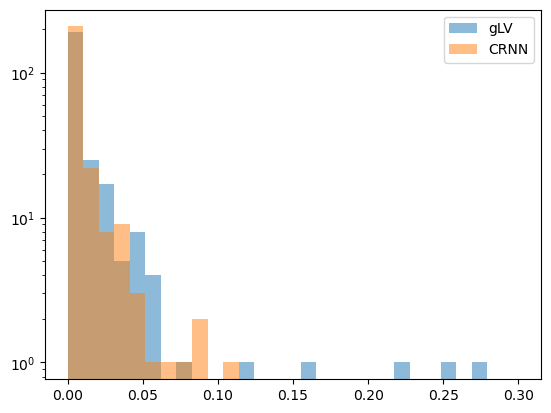

In [6]:
bins = np.linspace(0, .3, 30)
plt.hist(y_err, bins=bins, alpha=.5, label='gLV')
plt.hist(y_err_c, bins=bins, alpha=.5, label='CRNN')
plt.yscale("log")
plt.legend()
plt.show()

## Compare fiber results 

In [7]:
crnn_kf = pd.read_csv("kfold/CRNN_kfold_fiber.csv")
glv_kf  = pd.read_csv("kfold/gLV_kfold_fiber.csv")

In [8]:
# ignore values known to be zero 
inds_pos = glv_kf['True'].values > 0

# error of null method
y_err = (glv_kf['True'].values[inds_pos] - glv_kf['Pred'].values[inds_pos])**2
# error of candidate method
y_err_c = (crnn_kf['True'].values[inds_pos] - crnn_kf['Pred'].values[inds_pos])**2

# calculate differences between the paired samples
differences = [e1-e2 for (e1, e2) in zip(y_err, y_err_c)]

# calculate test statistic
test_statistic = sum(1 for d in differences if d > 0)

# calculate p-value from binomial distribution 
p_value = binom.sf(test_statistic - 1, len(differences), 0.5)

p_value

3.3202097416583126e-05

In [9]:
np.nanmedian(y_err)

0.0009400012179328149

In [10]:
np.nanmedian(y_err_c)

0.0006628588139070534

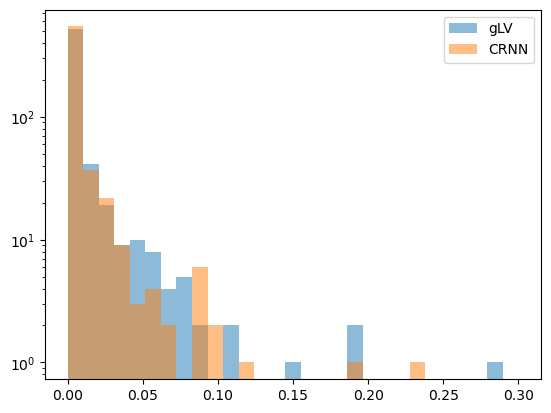

In [11]:
bins = np.linspace(0, .3, 30)
plt.hist(y_err, bins=bins, alpha=.5, label='gLV')
plt.hist(y_err_c, bins=bins, alpha=.5, label='CRNN')
plt.yscale("log")
plt.legend()
plt.show()